In [19]:
from typing import TypedDict , Literal

class PortfolioState(TypedDict): 
    amount_usd: float
    total_usd : float
    target_currency : Literal["INR", "EUR"]
    total : float

In [20]:
def calc_total_usd(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] * 1.08  
    return state

In [21]:
def calc_total_eur (state: PortfolioState) -> PortfolioState:
    state["total_eur"] = state["total_usd"] * 0.95 
    return state

In [22]:
def calc_total_inr (state: PortfolioState) -> PortfolioState:
    state["total_inr"] = state["total_usd"] * 85.0  
    return state

In [23]:
def conversion_choice(state: PortfolioState) -> str:
    return state["target_currency"]

In [24]:
from langgraph.graph import StateGraph , START , END

builder = StateGraph(PortfolioState)
builder.add_node("calc_total_usd", calc_total_usd)
builder.add_node("conv_to_inr", calc_total_inr)
builder.add_node("conv_to_eur", calc_total_eur)

builder.add_edge(START, "calc_total_usd" )
builder.add_conditional_edges("calc_total_usd",conversion_choice , 
    {
    "INR": "conv_to_inr",
    "EUR": "conv_to_eur"
})
builder.add_edge(["conv_to_inr" , "conv_to_eur"], END)
graph = builder.compile()

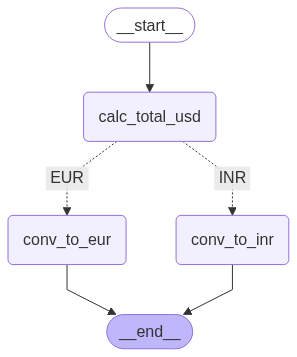

In [25]:
from IPython.display import Image , display

display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
graph.invoke(
    {
        "amount_usd": 1000.0,
        "target_currency": "INR"
    }
)

{'amount_usd': 1000.0, 'total_usd': 1080.0, 'target_currency': 'INR'}